In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
%matplotlib inline
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay

# Titanic Competition

In [4]:
df = pd.read_csv('train.csv')

In [5]:
dfo = df.select_dtypes(include=['object'])

#drops cabin info, also name and ticket
df = pd.DataFrame(df.drop(dfo.columns,axis =1)).merge(pd.get_dummies(dfo.drop(['Name','Cabin','Ticket'],axis =1)),
                                                      left_index=True,right_index=True).drop(['PassengerId'],axis =1)

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [21]:
#imputes age
from sklearn.impute import KNNImputer

imp1 = KNNImputer()
df_imp1 = pd.DataFrame(imp1.fit_transform(df))
df_imp1.columns = df.columns
df_imp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      891 non-null    float64
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    float64
 4   Parch       891 non-null    float64
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    float64
 7   Sex_male    891 non-null    float64
 8   Embarked_C  891 non-null    float64
 9   Embarked_Q  891 non-null    float64
 10  Embarked_S  891 non-null    float64
dtypes: float64(11)
memory usage: 76.7 KB


In [7]:
# getting X and y

X = df_imp1.drop('Survived', axis=1)
y = df_imp1.Survived

# Scaling
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [8]:
#train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [9]:
# testing learning rates, 0.25 wins
# looks for ways to automate this, pipeline ect

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.802
Accuracy score (validation): 0.789

Learning rate:  0.1
Accuracy score (training): 0.822
Accuracy score (validation): 0.803

Learning rate:  0.25
Accuracy score (training): 0.834
Accuracy score (validation): 0.807

Learning rate:  0.5
Accuracy score (training): 0.846
Accuracy score (validation): 0.794

Learning rate:  0.75
Accuracy score (training): 0.849
Accuracy score (validation): 0.803

Learning rate:  1
Accuracy score (training): 0.852
Accuracy score (validation): 0.794



In [10]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = .25, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       134
         1.0       0.77      0.73      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
print(auc)

0.7942730169377831


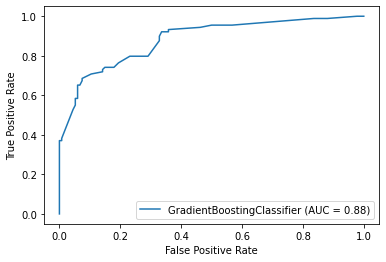

In [13]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(gb, X_test, y_test)

In [65]:
df_t = pd.read_csv('test.csv')

In [66]:
# applying all steps to test set
dfo_t = df_t.select_dtypes(include=['object'])

df_t = pd.DataFrame(df_t.drop(dfo_t.columns,axis =1)).merge(pd.get_dummies(dfo_t.drop(['Name','Cabin','Ticket'],axis =1)),
                                                      left_index=True,right_index=True).drop(['PassengerId'],axis =1)


In [28]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         332 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        417 non-null    float64
 5   Sex_female  418 non-null    uint8  
 6   Sex_male    418 non-null    uint8  
 7   Embarked_C  418 non-null    uint8  
 8   Embarked_Q  418 non-null    uint8  
 9   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.5 KB


In [23]:
df_t_imp1 = pd.DataFrame(imp1.fit_transform(df_t))
df_t_imp1.columns = df_t.columns
df_t_imp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    float64
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    float64
 3   Parch       418 non-null    float64
 4   Fare        418 non-null    float64
 5   Sex_female  418 non-null    float64
 6   Sex_male    418 non-null    float64
 7   Embarked_C  418 non-null    float64
 8   Embarked_Q  418 non-null    float64
 9   Embarked_S  418 non-null    float64
dtypes: float64(10)
memory usage: 32.8 KB


In [68]:
scaler = preprocessing.StandardScaler().fit(df_t)
X_t_scaled = scaler.transform(df_t)

In [69]:
y_t_pred = gb.predict(X_t_scaled)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [27]:
y_t_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [31]:
df_t['Survived'] = y_t_pred

In [40]:
df_t

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,34.5,0,0,7.8292,0,1,0,1,0,1.0
1,3,47.0,1,0,7.0000,1,0,0,0,1,1.0
2,2,62.0,0,0,9.6875,0,1,0,1,0,1.0
3,3,27.0,0,0,8.6625,0,1,0,0,1,1.0
4,3,22.0,1,1,12.2875,1,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,0,1,0,0,1,1.0
414,1,39.0,0,0,108.9000,1,0,1,0,0,1.0
415,3,38.5,0,0,7.2500,0,1,0,0,1,1.0
416,3,NaN,0,0,8.0500,0,1,0,0,1,1.0


In [60]:
df_ = pd.read_csv('test.csv')

In [61]:
df_

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [48]:
df_sub = pd.DataFrame(df_['PassengerId'])

In [55]:
df_sub['Survived'] = y_t_pred

In [63]:
df_sub = df_sub.astype(int)

In [64]:
df_sub.to_csv('submission', index=False)